# Canonical Discriminant Analysis on Iris dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from seaborn import load_dataset
import pandas as pd

iris = load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Chargement de la 
from discrimintools import CANDISC

candisc = CANDISC(n_components=2,target=["species"],parallelize=False,priors="prop")
# Instanciattion
candisc.fit(iris)

CANDISC(n_components=2, priors='prop', target=['species'])

## Summary Information

### Summary information

In [4]:
# Summary Information
candisc.summary_information_

,infos,Value,DF,DF value
0,Total Sample Size,150,DF Total,149
1,Variables,4,DF Within Classes,147
2,Classes,3,DF Between Classes,2


### Class level Information

In [5]:
# Class level information
candisc.statistics_["information"]

,Frequency,Proportion,Prior Probability
species,,,
setosa,50,0.333333,0.333333
versicolor,50,0.333333,0.333333
virginica,50,0.333333,0.333333


## Squared Mahalanobis Distances and Distance statistics

### Squared Distance to Species

In [6]:
# Squared Distance to Species
candisc.classes_["mahalanobis"]

,setosa,versicolor,virginica
setosa,0.000000,89.864186,179.384713
versicolor,89.864186,0.000000,17.201066
virginica,179.384713,17.201066,0.000000


## Univariate and Multivariate Statistics

### Univariate Test Statistics

In [7]:
# Univariate statistics
candisc.statistics_["univariate"]

,Std. Dev.,R-squared,Rsq/(1-Rsq),F-statistic,Prob (F-statistic)
sepal_length,0.828066,0.618706,1.622646,119.264502,1.669669e-31
sepal_width,0.435866,0.400783,0.668844,49.160040,4.492017e-17
petal_length,1.765298,0.941372,16.056615,1180.161182,2.856777e-91
petal_width,0.762238,0.928883,13.061322,960.007147,4.169446e-85


### Manova test

In [8]:
# MANOVA
print(candisc.statistics_["manova"])

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.0000   53.4665 0.0000
 Hotelling-Lawley trace 32.4773 8.0000 203.4024  582.1970 0.0000
    Roy's greatest root 32.1919 4.0000 145.0000 1166.9574 0.0000



### Anova

In [9]:
candisc.statistics_["anova"]

sum_sq     df     mean_sq            F  \
sepal_length C(species)   63.212133    2.0   31.606067   119.264502   
             Residual     38.956200  147.0    0.265008          NaN   
sepal_width  C(species)   11.344933    2.0    5.672467    49.160040   
             Residual     16.962000  147.0    0.115388          NaN   
petal_length C(species)  437.102800    2.0  218.551400  1180.161182   
             Residual     27.222600  147.0    0.185188          NaN   
petal_width  C(species)   80.413333    2.0   40.206667   960.007147   
             Residual      6.156600  147.0    0.041882          NaN   

                               PR(>F)    eta_sq  omega_sq  
sepal_length C(species)  1.669669e-31  0.618706  0.611931  
             Residual             NaN       NaN       NaN  
sepal_width  C(species)  4.492017e-17  0.400783  0.391036  
             Residual             NaN       NaN       NaN  
petal_length C(species)  2.856777e-91  0.941372  0.940199  
             Residual             NaN       NaN       NaN  
petal_width  C(species)  4.169446e-85  0.928883  0.927467  
             Residual             NaN       NaN       NaN

### Correlation ratio

In [10]:
candisc.statistics_["Eta2"]

,Sum. Intra,Sum. Inter,Eta2,F-stats,pvalue
sepal_length,38.9562,63.2121,0.6187,119.2645,0.0
sepal_width,16.9620,11.3449,0.4008,49.1600,0.0
petal_length,27.2226,437.1028,0.9414,1180.1612,0.0
petal_width,6.1566,80.4133,0.9289,960.0071,0.0


## Canonical Correlations and Eigenvalues

### Eigenvalues

In [11]:
candisc.eig_

,Eigenvalue,Difference,Proportion,Cumulative
LD1,32.191929,31.906538,99.12126,99.12126
LD2,0.285391,NaN,0.87874,100.00000


### Likelihood ratio test

In [12]:
candisc.statistics_["likelihood_test"]

,statistic,DDL num.,DDL den.,Pr>F
0,199.145344,8.0,288.0,1.110223e-16
1,13.793900,3.0,145.0,5.794465e-08


## Correlations between Canonical and Original Variables

### Total Canonical Structure

In [13]:
candisc.corr_["total"]

,LD1,LD2
sepal_length,0.791888,0.217593
sepal_width,-0.530759,0.757989
petal_length,0.984951,0.046037
petal_width,0.972812,0.222902


### Between Canonical Structure

In [14]:
candisc.corr_["between"]

,LD1,LD2
sepal_length,0.991468,0.130348
sepal_width,-0.825658,0.564171
petal_length,0.999750,0.022358
petal_width,0.994044,0.108977


### Polled Within Canonical Structure

In [15]:
candisc.corr_["within"]

,LD1,LD2
sepal_length,0.222596,0.310812
sepal_width,-0.119012,0.863681
petal_length,0.706065,0.167701
petal_width,0.633178,0.737242


## Canonical Coefficients

### Raw Canonical Coefficients

In [16]:
candisc.coef_

,LD1,LD2
sepal_length,-0.829378,0.024102
sepal_width,-1.534473,2.164521
petal_length,2.201212,-0.931921
petal_width,2.810460,2.839188


## Canonical Means

In [17]:
candisc.classes_["coord"]

,LD1,LD2
species,,
setosa,-7.607600,0.215133
versicolor,1.825049,-0.727900
virginica,5.782550,0.512767


## Extractions

In [18]:
from discrimintools import get_candisc, summaryCANDISC
ind = get_candisc(candisc,choice="ind")
vcov = get_candisc(candisc,choice="covariance")
corr = get_candisc(candisc,choice="correlation")
coef = get_candisc(candisc,choice="absolute")
score_coef = get_candisc(candisc,choice="score")

In [19]:
summaryCANDISC(candisc)

                     Canonical Discriminant Analysis - Results                     


Summary Information

               infos  Value                  DF  DF value
0  Total Sample Size    150            DF Total       149
1          Variables      4   DF Within Classes       147
2            Classes      3  DF Between Classes         2

Class Level information

            Frequency  Proportion  Prior Probability
species                                             
setosa             50    0.333333           0.333333
versicolor         50    0.333333           0.333333
virginica          50    0.333333           0.333333

Importance of components
                         LD1      LD2
Variance              32.192    0.285
Difference            31.907      NaN
% of var.             99.121    0.879
Cumulative % of var.  99.121  100.000

Test of H0: The canonical correlations in the current row and all that follow are zero

   statistic  DDL num.  DDL den.  Pr>F
0    199.145       8.0    

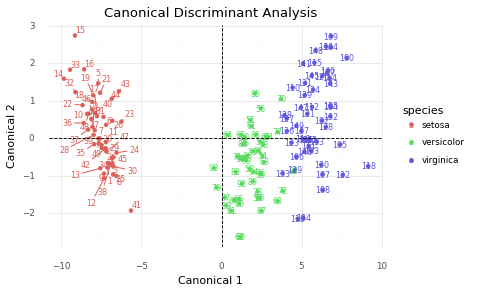

In [20]:
from discrimintools import fviz_candisc
p = fviz_candisc(candisc,repel=True)
print(p)

## Others functions

### Fit transform

In [21]:
candisc.fit_transform(iris)

,LD1,LD2
0,-8.061800,0.300421
1,-7.128688,-0.786660
2,-7.489828,-0.265384
3,-6.813201,-0.670631
4,-8.132309,0.514463
...,...,...
145,5.645003,1.677717
146,5.179565,-0.363475
147,4.967741,0.821141
148,5.886145,2.345091


### transform

In [22]:
candisc.transform(iris)

,LD1,LD2
0,-8.061800,0.300421
1,-7.128688,-0.786660
2,-7.489828,-0.265384
3,-6.813201,-0.670631
4,-8.132309,0.514463
...,...,...
145,5.645003,1.677717
146,5.179565,-0.363475
147,4.967741,0.821141
148,5.886145,2.345091


### decision function

In [23]:
candisc.decision_function(iris)

,setosa,versicolor,virginica
0,31.336036,-17.960794,-64.412740
1,24.003426,-15.466532,-59.574391
2,26.862980,-16.505067,-61.395410
3,21.628288,-14.975210,-57.690575
4,31.918492,-18.245278,-64.710711
...,...,...,...
145,-72.643537,6.052267,15.553773
146,-69.541792,6.688601,11.815694
147,-67.675473,5.439731,11.198244
148,-74.334475,6.006582,17.290395


### Predict proba

In [24]:
# Predict proba
candisc.predict_proba(iris)

,setosa,versicolor,virginica
0,1.000000e+00,3.896358e-22,2.611168e-42
1,1.000000e+00,7.217970e-18,5.042143e-37
2,1.000000e+00,1.463849e-19,4.675932e-39
3,1.000000e+00,1.268536e-16,3.566610e-35
4,1.000000e+00,1.637387e-22,1.082605e-42
...,...,...,...
145,4.970070e-39,7.473361e-05,9.999253e-01
146,4.616611e-36,5.898784e-03,9.941012e-01
147,5.548962e-35,3.145874e-03,9.968541e-01
148,1.613687e-40,1.257468e-05,9.999874e-01


### Predict

In [25]:
# predict
candisc.predict(iris)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: prediction, Length: 150, dtype: object

### Accuracy - score

In [26]:
candisc.score(iris,iris["species"])

0.98

### Prediction table

In [27]:
# Prediction table
candisc.pred_table()

prediction,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49
